# A Guide to Living in Shanghai

## Coursera Applied Data Science Specialization "The Battle of Neighborhoods" Capstone Project Notebook

## 1.Import libraries and read data

In [19]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import folium
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from IPython.display import Image

In [7]:
shanghai_data=pd.read_excel("C:\Coursera\Applied Data Science\Applied Data Science Capstone\Week 4\Shanghai Neighborhood.xlsx")
shanghai_econ=pd.read_csv("C:\Coursera\Applied Data Science\Applied Data Science Capstone\Week 4\Shanghai District.csv")

In [8]:
shanghai_econ.head()

District  Population Density  Salary  Home Price       GDP  GDP PP
0     Pudong                4567    8170       48713  1046.009  175448
1    Huangpu               32004    7160       81375   227.030  320701
2      Xuhui               19874    7640       71064   167.000  144983
3  Changning               18112    8030       68491   142.800  191305
4    Jing'an               28910    8380       66228   184.700  159550

In [9]:
shanghai_data

District              Neighborhood Neighborhood Chinese Name
0      Pudong                  Lujiazui                       陆家嘴
1      Pudong              Century Park                      世纪公园
2      Pudong                 Zhoujiadu                       周家渡
3      Pudong                Zhangjiang                        张江
4     Huangpu           People's Square                      人民广场
5     Huangpu              Huaihai Road                       淮海路
6     Huangpu                  The Bund                        外滩
7     Huangpu  Former French Concession                      旧法租界
8     Huangpu                 Xintiandi                       新天地
9     Huangpu                  Dapuqiao                       打浦桥
10    Huangpu                  Laoximen                       老西门
11    Huangpu                 Yu Garden                        豫园
12      Xuhui             Hengshan Road                       衡山路
13      Xuhui                  Xujiahui                       徐家汇
14      Xuhui                Xietu Road                       斜土路
15      Xuhui                 Caohejing                       漕河泾
16      Xuhui                   Longhua                        龙华
17  Changning                     Gubei                        古北
18  Changning                  Hongqiao                        虹桥
19    Jing'an            Jing'an Temple                       静安寺
20    Jing'an  Shanghai Railway Station                     上海火车站
21    Jing'an            Jiangning Road                       江宁路
22      Putuo            Changshou Road                       长寿路
23      Putuo                   Caoyang                        曹杨
24      Putuo                    Zhenru                        真如
25      Putuo              Taopu Xincun                       桃浦镇
26      Putuo              Yichuan Park                       宜川路
27    Hongkou                 Tilanqiao                       提篮桥
28    Hongkou                Luxun Park                      鲁迅公园
29     Yangpu               Wujiaochang                       五角场
30     Yangpu              Dinghai Road                       定海路
31     Yangpu         Xin Jiangwancheng                      新江湾城
32    Minhang                Qibao Zhen                        七宝
33    Minhang                 Xinzhuang                        莘庄
34    Minhang                 Zhuanqiao                        颛桥
35    Minhang                    Maqiao                        马桥
36    Minhang           Jiangchuan Road                       江川路
37    Baoshan                Youyi Road                       友谊路
38    Baoshan                Gucun Park                      顾村公园
39    Jiading                   Jiading                        嘉定
40    Jiading                    Anting                        安亭
41    Jiading                  Nanxiang                        南翔
42    Jinshan                Jinshanwei                       金山卫
43  Songjiang                 Songjiang                        松江
44     Qingpu                    Qingpu                        青浦
45   Fengxian               Haiwan Zhen                       海湾镇
46  Chongming              Jianshe Zhen                       建设镇

### 2. Get neighborhood coordinates

In [10]:
geolocator=Nominatim(user_agent="shanghai_explorer")
shanghai_data['Neighborhood']=shanghai_data['Neighborhood']+', Shanghai'
shanghai_data['Coordinates']=shanghai_data['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
shanghai_data[['Latitude','Longitude']]=shanghai_data['Coordinates'].apply(pd.Series)
shanghai_data.drop(['Coordinates'],axis=1,inplace=True)
shanghai_data.head(10)

District                        Neighborhood Neighborhood Chinese Name  \
0   Pudong                  Lujiazui, Shanghai                       陆家嘴   
1   Pudong              Century Park, Shanghai                      世纪公园   
2   Pudong                 Zhoujiadu, Shanghai                       周家渡   
3   Pudong                Zhangjiang, Shanghai                        张江   
4  Huangpu           People's Square, Shanghai                      人民广场   
5  Huangpu              Huaihai Road, Shanghai                       淮海路   
6  Huangpu                  The Bund, Shanghai                        外滩   
7  Huangpu  Former French Concession, Shanghai                      旧法租界   
8  Huangpu                 Xintiandi, Shanghai                       新天地   
9  Huangpu                  Dapuqiao, Shanghai                       打浦桥   

    Latitude   Longitude  
0  31.240168  121.497945  
1  31.218700  121.554338  
2  31.187146  121.489237  
3  31.207347  121.610182  
4  31.231926  121.471535  
5  31.220936  121.467353  
6  31.234038  121.488921  
7  31.211806  121.464982  
8  31.217936  121.469819  
9  31.208286  121.463941

### 3. Visualize all neighborhoods on the map of Shanghai

In [29]:
address='Shanghai'
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
map_shanghai_neighborhoods=folium.Map(location=[latitude, longitude], zoom_start=11,tiles="OpenStreetMap")
Districts=['Pudong','Huangpu','Xuhui','Changning',"Jing'an",
           'Putuo','Hongkou','Yangpu','Minhang','Baoshan','Jiading',
           'Jinshan','Songjiang','Qingpu','Fengxian','Chongming']

rainbow=['#00008B','#008B8B','#B8860B','#A9A9A9','#006400','#BDB76B',
         '#8B008B','#556B2F','#FF8C00','#9932CC','#8B0000','#E9967A',
         '#8FBC8F','#483D8B','#2F4F4F','#00CED1']
for lat, lng, label,distr in zip(shanghai_data['Latitude'],
                                 shanghai_data['Longitude'],
                                 shanghai_data['Neighborhood'],
                                 shanghai_data['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.8,
        parse_html=False).add_to(map_shanghai_neighborhoods)
map_shanghai_neighborhoods

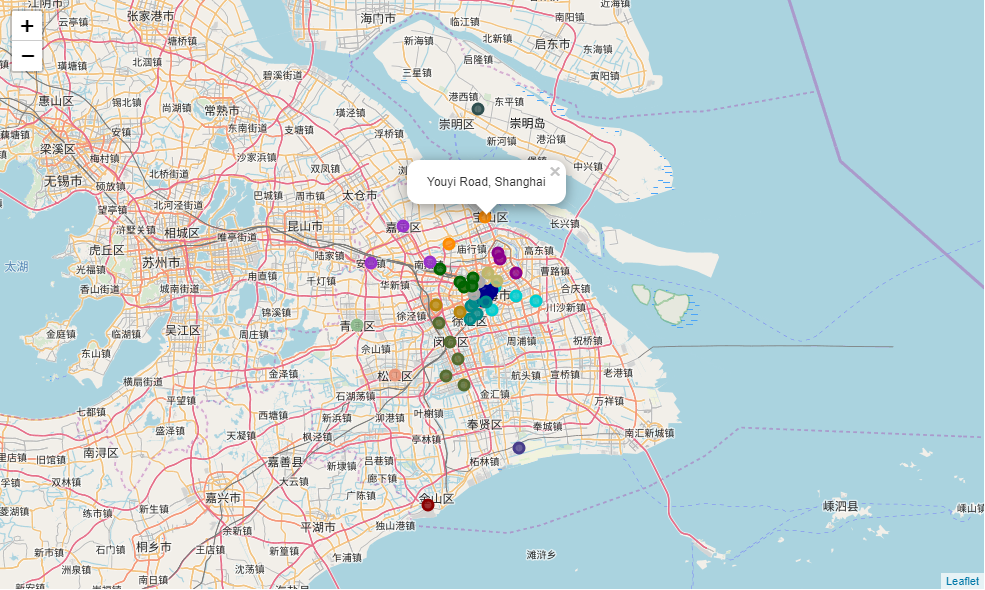

In [27]:
path="D:/Learning/Applied Data Science/Course 4 Applied Data Science Capstone/Week 4 and 5 Project/"
Image(filename=path+"Shanghai All Neighborhoods Map.png")

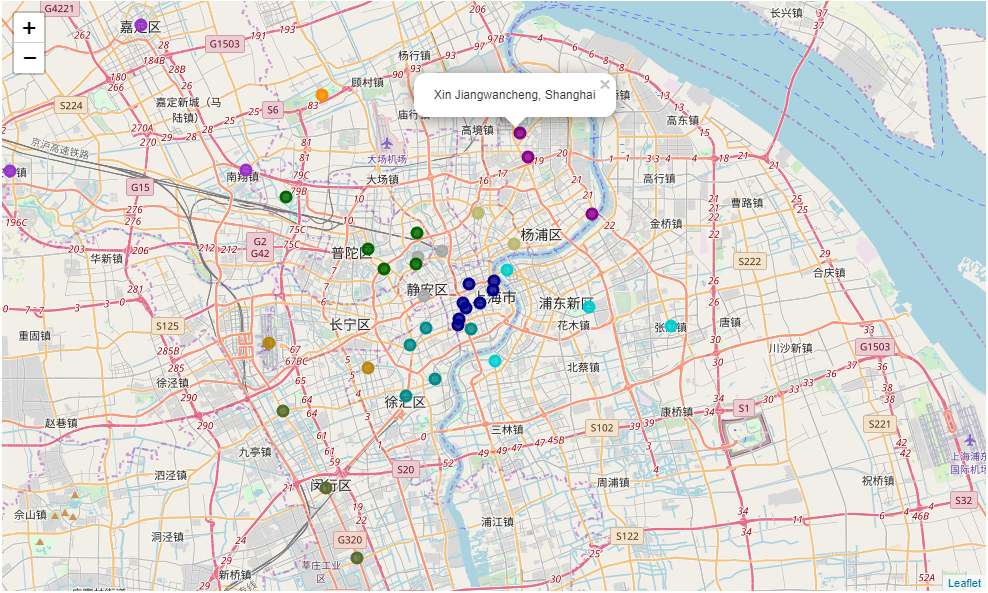

In [30]:
# Zoomed version
Image(filename=path+"Shanghai All Neighborhoods Map (Zoomed In).png")

### 4. Define Foursquare credentials, version, limit and radius

In [31]:
CLIENT_ID = 'V0D1DCJUEXBOEEHINEKROVT522PQ3RBYPNH4KUUWZ34UP4A5'
CLIENT_SECRET = 'TKKL1NHBVQJEKAGQPMIBD0VCVB2CUEHS1MQTSSFWIUXLFVG5' 
VERSION = '20180605'
LIMIT=200
radius=500

### 5. The function getNearbyVenues borrowed from the lab

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### 6. Apply function

In [33]:
shanghai_venues = getNearbyVenues(names=shanghai_data['Neighborhood'],
                                  latitudes=shanghai_data['Latitude'],
                                  longitudes=shanghai_data['Longitude'])

Lujiazui, Shanghai
Century Park, Shanghai
Zhoujiadu, Shanghai
Zhangjiang, Shanghai
People's Square, Shanghai
Huaihai Road, Shanghai
The Bund, Shanghai
Former French Concession, Shanghai
Xintiandi, Shanghai
Dapuqiao, Shanghai
Laoximen, Shanghai
Yu Garden, Shanghai
Hengshan Road, Shanghai
Xujiahui, Shanghai
Xietu Road, Shanghai
Caohejing, Shanghai
Longhua, Shanghai
Gubei, Shanghai
Hongqiao, Shanghai
Jing'an Temple, Shanghai
Shanghai Railway Station, Shanghai
Jiangning Road, Shanghai
Changshou Road, Shanghai
Caoyang, Shanghai
Zhenru, Shanghai
Taopu Xincun, Shanghai
Yichuan Park, Shanghai
Tilanqiao, Shanghai
Luxun Park, Shanghai
Wujiaochang, Shanghai
Dinghai Road, Shanghai
Xin Jiangwancheng, Shanghai
Qibao Zhen, Shanghai
Xinzhuang, Shanghai
Zhuanqiao, Shanghai
Maqiao, Shanghai
Jiangchuan Road, Shanghai
Youyi Road, Shanghai
Gucun Park, Shanghai
Jiading, Shanghai
Anting, Shanghai
Nanxiang, Shanghai
Jinshanwei, Shanghai
Songjiang, Shanghai
Qingpu, Shanghai
Haiwan Zhen, Shanghai
Jianshe Zhen, 

### 7. Check the resulting venues dataframe

#### 7.a Attach district column

In [34]:
shanghai_venues_district=pd.merge(shanghai_venues,shanghai_data[['District','Neighborhood']],how='left',on='Neighborhood')

#### 7.b Check the size and top 5 rows of venues dataframe

In [49]:
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (shanghai_venues_district.shape,shanghai_venues_district.shape[0]))
shanghai_venues_district.head()

The shape of the dataframe is (814, 9). The dataset has 814 rows.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Lujiazui, Shanghai              31.240168              121.497945   
1  Lujiazui, Shanghai              31.240168              121.497945   
2  Lujiazui, Shanghai              31.240168              121.497945   
3  Lujiazui, Shanghai              31.240168              121.497945   
4  Lujiazui, Shanghai              31.240168              121.497945   

                                             Venue  Venue Latitude  \
0  The Ritz-Carlton Shanghai, Pudong (上海浦东丽思卡尔顿酒店)       31.238699   
1                                            Flair       31.238750   
2                          Apple Pudong (Apple 浦东)       31.239282   
3                              IFC Mall (国际金融中心商场)       31.238492   
4           Oriental Tower-Space Module 350m (太空舱)       31.240493   

   Venue Longitude     Venue Category District Neighborhood2  
0       121.496778              Hotel   Pudong      Lujiazui  
1       121.496684          Hotel Bar   Pudong      Lujiazui  
2       121.497060  Electronics Store   Pudong      Lujiazui  
3       121.497902      Shopping Mall   Pudong      Lujiazui  
4       121.495593     Scenic Lookout   Pudong      Lujiazui

#### 7.c Further cleaning

In [36]:
# Split Neighborhood column. Want a new Neighborhood column which does not contain the word "Shanghai"
shanghai_venues_district[['Neighborhood2','Shanghai']]=shanghai_venues_district['Neighborhood'].str.split(',',expand=True)

# Drop Shanghai column
shanghai_venues_district.drop(['Shanghai'],axis=1,inplace=True)

### 8. Exploratory data analysis of venues in Shanghai

#### 8.a Map of venues in Shanghai

In [40]:
def draw_map(data,zoom_para):
    
    # Base map
    map_shanghai=folium.Map(location=[latitude, longitude], zoom_start=zoom_para,tiles="OpenStreetMap")
    
    Districts=['Pudong','Huangpu','Xuhui','Changning',"Jing'an",
           'Putuo','Hongkou','Yangpu','Minhang','Baoshan','Jiading',
           'Jinshan','Songjiang','Qingpu','Fengxian','Chongming']
    
    rainbow=['#00008B','#008B8B','#B8860B','#A9A9A9','#006400','#BDB76B',
         '#8B008B','#556B2F','#FF8C00','#9932CC','#8B0000','#E9967A',
         '#8FBC8F','#483D8B','#2F4F4F','#00CED1']
    
    for lat, lng, label,distr,nb in zip(data['Venue Latitude'],
                                        data['Venue Longitude'],
                                        data['Venue'],
                                        data['District'],
                                        data['Neighborhood2']):
        label = folium.Popup(str(label)+', '+str(nb)+', '+str(distr), parse_html=True)
        
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.2,
        parse_html=False).add_to(map_shanghai)  
    
    return(map_shanghai)

In [42]:
# Draw map using venues data
draw_map(shanghai_venues_district,11)

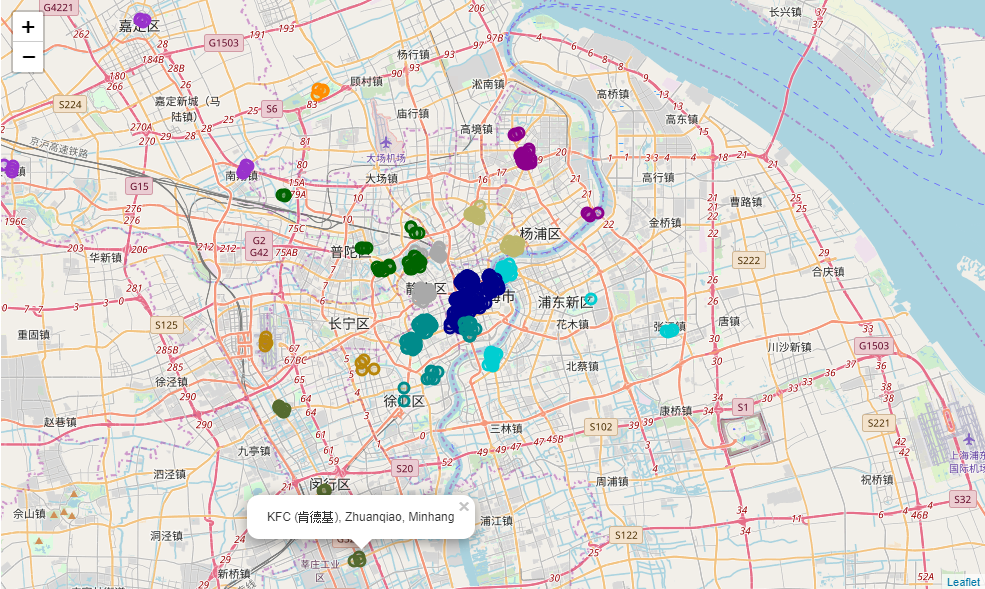

In [43]:
# Upload Screenshot
Image(filename=path+"Shanghai All Venues Map.png")

#### 8.b Check how many venues were returned for each neighborhood

In [44]:
shanghai_venues_count_list=shanghai_venues_district.groupby('Neighborhood')['Venue'].count().to_frame() # series to data frame
shanghai_venues_count_list.rename(columns={'Venue':'Number of Venues'},inplace=True)

In [47]:
shanghai_venues_count_list.sort_values(by=['Number of Venues'],ascending=False).head()

Number of Venues
Neighborhood                               
Huaihai Road, Shanghai                   88
Xujiahui, Shanghai                       61
People's Square, Shanghai                49
Yu Garden, Shanghai                      47
Lujiazui, Shanghai                       45

In [48]:
shanghai_venues_count_list.sort_values(by=['Number of Venues'],ascending=False).tail()

Number of Venues
Neighborhood                            
Songjiang, Shanghai                    2
Caohejing, Shanghai                    2
Haiwan Zhen, Shanghai                  1
Century Park, Shanghai                 1
Maqiao, Shanghai                       1

#### 8.c Check what are the most/least popular venue categories in Shanghai

In [50]:
shanghai_popular_venues=shanghai_venues_district.groupby('Venue Category')['Venue'].count().to_frame()
shanghai_popular_venues.rename(columns={'Venue':'Number of Venues'},inplace=True)

In [52]:
# Show top 5 categories that have the highest number of venues
shanghai_popular_venues.sort_values(by=['Number of Venues'],ascending=False).head(5)

Number of Venues
Venue Category                        
Coffee Shop                         63
Chinese Restaurant                  50
Café                                38
Hotel                               37
Fast Food Restaurant                32

In [53]:
# Show top 5 categories that have the lowest number of venues
shanghai_popular_venues.sort_values(by=['Number of Venues'],ascending=False).tail(5)

Number of Venues
Venue Category                       
Frozen Yogurt Shop                  1
Shopping Plaza                      1
Skating Rink                        1
Soccer Field                        1
Zhejiang Restaurant                 1

#### 8.d Visualize coffee shops in Shanghai

In [54]:
draw_map(shanghai_venues_district[shanghai_venues_district['Venue Category']=='Coffee Shop'],11)

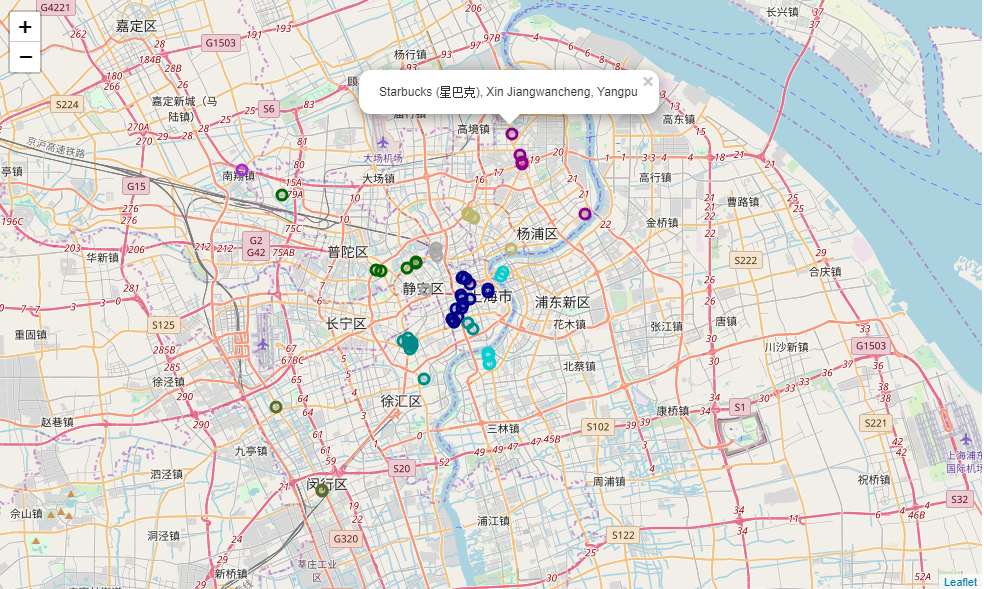

In [55]:
# Upload Screenshot
Image(filename=path+"Shanghai All Coffee Shops.png")

#### 8.e Visualize shopping malls in Shanghai

In [56]:
draw_map(shanghai_venues_district[shanghai_venues_district['Venue Category']=='Shopping Mall'],11)

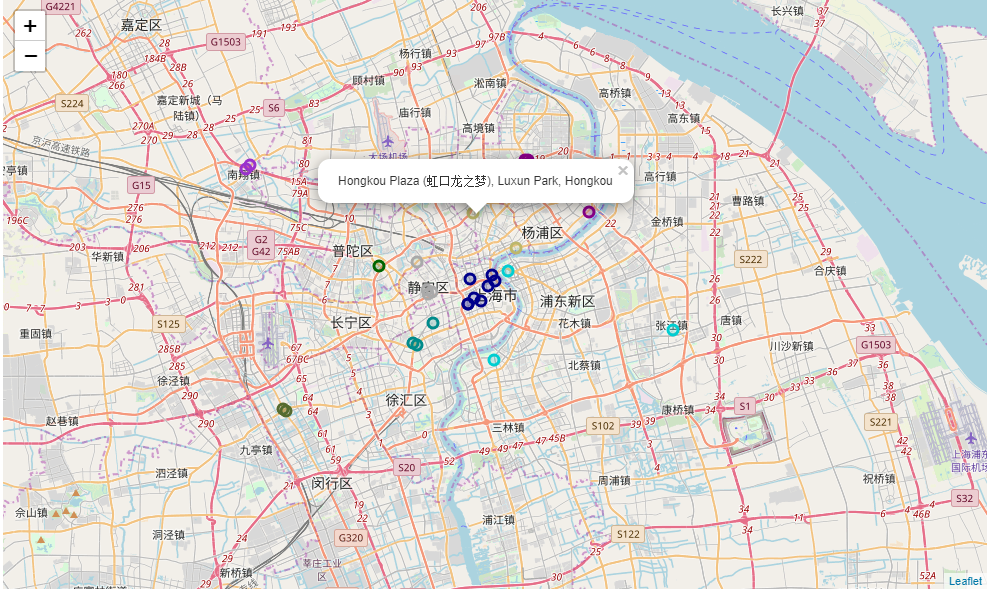

In [57]:
# Upload Screenshot
Image(filename=path+"Shanghai All Shopping Malls.png")

#### 8.f Visualize parks in Shanghai

In [58]:
draw_map(shanghai_venues_district[shanghai_venues_district['Venue Category']=='Park'],11)

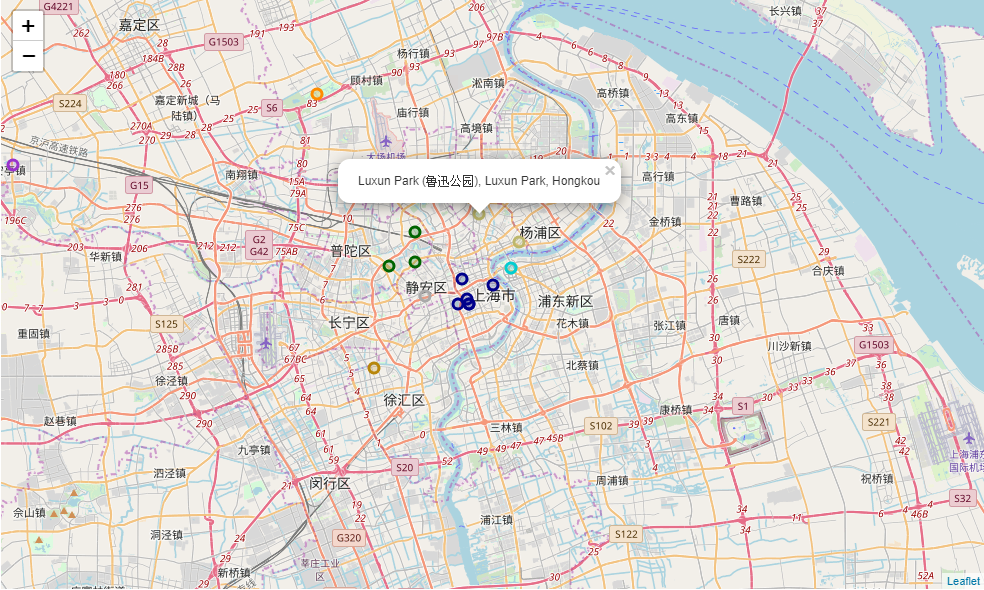

In [59]:
# Upload Screenshot
Image(filename=path+"Shanghai All Parks.png")

### 9. List all potential venues for each neighborhood

#### 9.a Create dummy variables based on Venue Category for each row in toronto_venues dataframe

In [60]:
# One hot encoding
shanghai_onehot = pd.get_dummies(shanghai_venues_district[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
shanghai_onehot['Neighbourhood']=shanghai_venues_district['Neighborhood']
# Note: In the lab, the column name in the dummy variale df is the same as the one in no-dv df. Here it won't work.
# Column names must be different.

# Move Neighborhood column to the first column
fixed_columns = [shanghai_onehot.columns[-1]] + list(shanghai_onehot.columns[:-1])
shanghai_onehot = shanghai_onehot[fixed_columns]

# Check the number of rows. It must be equal to that of shanghai_venues_district
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (shanghai_onehot.shape,shanghai_onehot.shape[0]))

# print top 5 rows
shanghai_onehot.head()

The shape of the dataframe is (814, 157). The dataset has 814 rows.


Neighbourhood  Airport Service  American Restaurant  Art Gallery  \
0  Lujiazui, Shanghai                0                    0            0   
1  Lujiazui, Shanghai                0                    0            0   
2  Lujiazui, Shanghai                0                    0            0   
3  Lujiazui, Shanghai                0                    0            0   
4  Lujiazui, Shanghai                0                    0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  BBQ Joint  Bakery  Bar  \
0           0                    0                 0          0       0    0   
1           0                    0                 0          0       0    0   
2           0                    0                 0          0       0    0   
3           0                    0                 0          0       0    0   
4           0                    0                 0          0       0    0   

   ...  Vegetarian / Vegan Restaurant  Veterinarian  Video Store  \
0  ...                              0             0            0   
1  ...                              0             0            0   
2  ...                              0             0            0   
3  ...                              0             0            0   
4  ...                              0             0            0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Xinjiang Restaurant  \
0                      0           0         0                    0   
1                      0           0         0                    0   
2                      0           0         0                    0   
3                      0           0         0                    0   
4                      0           0         0                    0   

   Yoga Studio  Yunnan Restaurant  Zhejiang Restaurant  
0            0                  0                    0  
1            0                  0                    0  
2            0                  0                    0  
3            0                  0                    0  
4            0                  0                    0  

[5 rows x 157 columns]

### 9.b Group rows by neighborhood to generate relative frequency

In [63]:
# Group by
shanghai_grouped=shanghai_onehot.groupby('Neighbourhood').mean().reset_index()

# Check the shape of shanghai_grouped. The number of rows must be equal to that of shanghai_data (both dfs are grouped by neighborhood)
print("The shape of the dataframe is {}. The dataset has {} rows.".format
      (shanghai_grouped.shape,shanghai_grouped.shape[0]))
# Note: here the row number is smaller than the row number of shanghai_data (45<47) because two obs are dropped due to lack of data

# Print the top 5 rows
shanghai_grouped.head()
# Note: The sum of all column values for each row is 1 (100%). The number in each cell is relative frequency

The shape of the dataframe is (45, 157). The dataset has 45 rows.


Neighbourhood  Airport Service  American Restaurant  \
0          Anting, Shanghai              0.0                  0.0   
1       Caohejing, Shanghai              0.0                  0.0   
2         Caoyang, Shanghai              0.0                  0.0   
3    Century Park, Shanghai              0.0                  0.0   
4  Changshou Road, Shanghai              0.0                  0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  BBQ Joint  \
0          0.0         0.0                  0.0          0.000000        0.0   
1          0.0         0.0                  0.0          0.000000        0.0   
2          0.0         0.0                  0.0          0.000000        0.0   
3          0.0         0.0                  0.0          0.000000        0.0   
4          0.0         0.0                  0.0          0.037037        0.0   

     Bakery  Bar  ...  Vegetarian / Vegan Restaurant  Veterinarian  \
0  0.000000  0.0  ...                            0.0           0.0   
1  0.000000  0.0  ...                            0.0           0.0   
2  0.000000  0.0  ...                            0.0           0.0   
3  0.000000  0.0  ...                            0.0           0.0   
4  0.074074  0.0  ...                            0.0           0.0   

   Video Store  Vietnamese Restaurant  Whisky Bar  Wine Bar  \
0          0.0                    0.0         0.0       0.0   
1          0.0                    0.0         0.0       0.0   
2          0.0                    0.0         0.0       0.0   
3          0.0                    0.0         0.0       0.0   
4          0.0                    0.0         0.0       0.0   

   Xinjiang Restaurant  Yoga Studio  Yunnan Restaurant  Zhejiang Restaurant  
0                  0.0          0.0                0.0                  0.0  
1                  0.0          0.0                0.0                  0.0  
2                  0.0          0.0                0.0                  0.0  
3                  0.0          0.0                0.0                  0.0  
4                  0.0          0.0                0.0                  0.0  

[5 rows x 157 columns]

### 9.c The most popular venue within each neighborhood

In [64]:
# Find the largest number within all columns
shanghai_grouped['Most Popular Venue']=shanghai_grouped.iloc[:,1:157].idxmax(axis=1)

# Remove Most Popular Venue column to the front
fixed_columns=[shanghai_grouped.columns[0]]+[shanghai_grouped.columns[-1]]+list(shanghai_grouped.columns[1:157])
shanghai_grouped=shanghai_grouped[fixed_columns]

# Only need Neighbourhood and Most Popular Venues columns from shanghai_grouped. Also need Neighborhood Chinese Name column from shanghai_data
most_popular=pd.merge(shanghai_grouped[['Neighbourhood','Most Popular Venue']],
                      shanghai_data[['Neighborhood','Neighborhood Chinese Name']],
                      how='left',
                      left_on='Neighbourhood',right_on='Neighborhood')

most_popular.drop(['Neighborhood'],axis=1,inplace=True)

# Move Neighborhood Chinese Name to the front
fixed_columns=[most_popular.columns[0]]+[most_popular.columns[-1]]+[most_popular.columns[1]]
most_popular=most_popular[fixed_columns]

# Show the most popular venue within each neighborhood
most_popular

Neighbourhood Neighborhood Chinese Name  \
0                     Anting, Shanghai                        安亭   
1                  Caohejing, Shanghai                       漕河泾   
2                    Caoyang, Shanghai                        曹杨   
3               Century Park, Shanghai                      世纪公园   
4             Changshou Road, Shanghai                       长寿路   
5                   Dapuqiao, Shanghai                       打浦桥   
6               Dinghai Road, Shanghai                       定海路   
7   Former French Concession, Shanghai                      旧法租界   
8                      Gubei, Shanghai                        古北   
9                 Gucun Park, Shanghai                      顾村公园   
10               Haiwan Zhen, Shanghai                       海湾镇   
11             Hengshan Road, Shanghai                       衡山路   
12                  Hongqiao, Shanghai                        虹桥   
13              Huaihai Road, Shanghai                       淮海路   
14                   Jiading, Shanghai                        嘉定   
15           Jiangchuan Road, Shanghai                       江川路   
16            Jiangning Road, Shanghai                       江宁路   
17            Jing'an Temple, Shanghai                       静安寺   
18                  Laoximen, Shanghai                       老西门   
19                   Longhua, Shanghai                        龙华   
20                  Lujiazui, Shanghai                       陆家嘴   
21                Luxun Park, Shanghai                      鲁迅公园   
22                    Maqiao, Shanghai                        马桥   
23                  Nanxiang, Shanghai                        南翔   
24           People's Square, Shanghai                      人民广场   
25                Qibao Zhen, Shanghai                        七宝   
26                    Qingpu, Shanghai                        青浦   
27  Shanghai Railway Station, Shanghai                     上海火车站   
28                 Songjiang, Shanghai                        松江   
29              Taopu Xincun, Shanghai                       桃浦镇   
30                  The Bund, Shanghai                        外滩   
31                 Tilanqiao, Shanghai                       提篮桥   
32               Wujiaochang, Shanghai                       五角场   
33                Xietu Road, Shanghai                       斜土路   
34         Xin Jiangwancheng, Shanghai                      新江湾城   
35                 Xintiandi, Shanghai                       新天地   
36                 Xinzhuang, Shanghai                        莘庄   
37                  Xujiahui, Shanghai                       徐家汇   
38              Yichuan Park, Shanghai                       宜川路   
39                Youyi Road, Shanghai                       友谊路   
40                 Yu Garden, Shanghai                        豫园   
41                Zhangjiang, Shanghai                        张江   
42                    Zhenru, Shanghai                        真如   
43                 Zhoujiadu, Shanghai                       周家渡   
44                 Zhuanqiao, Shanghai                        颛桥   

      Most Popular Venue  
0     Chinese Restaurant  
1      Convenience Store  
2            Coffee Shop  
3     Chinese Restaurant  
4     Chinese Restaurant  
5                   Café  
6            Coffee Shop  
7                   Café  
8    Japanese Restaurant  
9      Convenience Store  
10                 Hotel  
11                   Bar  
12       Airport Service  
13                  Café  
14                Bakery  
15      Asian Restaurant  
16           Coffee Shop  
17                 Hotel  
18          Noodle House  
19  Cantonese Restaurant  
20   Dumpling Restaurant  
21           Coffee Shop  
22            Playground  
23         Shopping Mall  
24    Chinese Restaurant  
25         Shopping Mall  
26  Fast Food Restaurant  
27  Fast Food Restaurant  
28     Indian Restaurant  
29           Coffee Shop  
30    Italian Restaurant  
31                 Hotel  
32   

### 10. Clustering

#### 10.a Dataset for clustering

In [65]:
# Add District to shanghai_grouped first. District will be the key
shanghai_grouped_with_district=pd.merge(shanghai_grouped,shanghai_data[['District','Neighborhood']],how='left',
                                       left_on='Neighbourhood',right_on='Neighborhood')

shanghai_grouped_with_district.drop(['Neighborhood_y'],axis=1,inplace=True)

# Then import economic data
shanghai_grouped_econ=pd.merge(shanghai_grouped_with_district,shanghai_econ,how='left',on='District')

# Drop all text columns. Prepare for clustering
shanghai_grouped_clustering=shanghai_grouped_econ.drop(['Neighbourhood','Most Popular Venue','District'],axis=1)
# All columns in shanghai_grouped_clustering are numeric

#### 10.b Define dependent variable and independent variables

In [67]:
# Set dependent variable and independent variables
y=shanghai_grouped_clustering['GDP PP']
X=shanghai_grouped_clustering.loc[:,shanghai_grouped_clustering.columns!='GDP PP']

#### 10.c Draw Elbow Curve to find the optimal number of clusters

Text(0.5, 1.0, 'Elbow Curve')

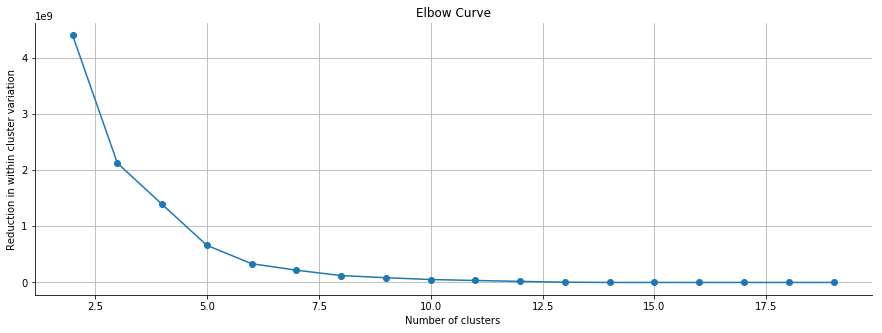

In [68]:
within_cluster_variance = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Elbow Curve')

#### 10.d Initiate clustering

In [69]:
# According to the elbow curve, pick 5 as the optimal number of clusters
kmeans=KMeans(n_clusters=5)

# Fit
kmeans.fit(X)

# Generate cluster 
y_kmeans=kmeans.predict(X)

# Attach cluster label to shanghai_grouped_econ. Now all neighborhoods have certain clusters assigned
shanghai_grouped_econ['Cluster']=y_kmeans

#### 10.e Merge neighborhood-wise geographic information into shanghai_grouped_econ

In [70]:
# Left Join
shanghai_merged=pd.merge(shanghai_grouped_econ,
                         shanghai_data[['Neighborhood','Neighborhood Chinese Name','Latitude','Longitude']],
                         how='left',
                         left_on='Neighbourhood',right_on='Neighborhood')

# Drop redundant Neighborhood column
shanghai_merged.drop(['Neighborhood'],axis=1,inplace=True)

# Final dataset. It has neighborhood level geographic, economic and demographic information as well as cluster label
shanghai_merged.head()

Neighbourhood  Most Popular Venue  Airport Service  \
0          Anting, Shanghai  Chinese Restaurant              0.0   
1       Caohejing, Shanghai   Convenience Store              0.0   
2         Caoyang, Shanghai         Coffee Shop              0.0   
3    Century Park, Shanghai  Chinese Restaurant              0.0   
4  Changshou Road, Shanghai  Chinese Restaurant              0.0   

   American Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                  0.0          0.0         0.0                  0.0   
1                  0.0          0.0         0.0                  0.0   
2                  0.0          0.0         0.0                  0.0   
3                  0.0          0.0         0.0                  0.0   
4                  0.0          0.0         0.0                  0.0   

   Asian Restaurant  BBQ Joint    Bakery  ...  District  Population Density  \
0          0.000000        0.0  0.000000  ...   Jiading                3408   
1          0.000000        0.0  0.000000  ...     Xuhui               19874   
2          0.000000        0.0  0.000000  ...     Putuo               23431   
3          0.000000        0.0  0.000000  ...    Pudong                4567   
4          0.037037        0.0  0.074074  ...     Putuo               23431   

   Salary  Home Price       GDP  GDP PP  Cluster  Neighborhood Chinese Name  \
0    7350       34425   236.270  136218        3                         安亭   
1    7640       71064   167.000  144983        4                        漕河泾   
2    7720       55738   100.170   72796        2                         曹杨   
3    8170       48713  1046.009  175448        1                       世纪公园   
4    7720       55738   100.170   72796        2                        长寿路   

    Latitude   Longitude  
0  31.298264  121.156828  
1  31.166211  121.428629  
2  31.241111  121.413074  
3  31.218700  121.554338  
4  31.244038  121.435138  

[5 rows x 168 columns]

### 11. Exploratory data analysis of clustered neighborhoods in Shanghai

#### 11.a Visualize clustered neighborhoods in Shanghai

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

kclusters=5

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nb, nbcn,cluster in zip(shanghai_merged['Latitude'], shanghai_merged['Longitude'],shanghai_merged['Neighbourhood'],shanghai_merged['Neighborhood Chinese Name'],shanghai_merged['Cluster']):
    label = folium.Popup(str(nb) + " ("+str(nbcn)+') '+ ' / Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1.0).add_to(map_clusters)
       
map_clusters

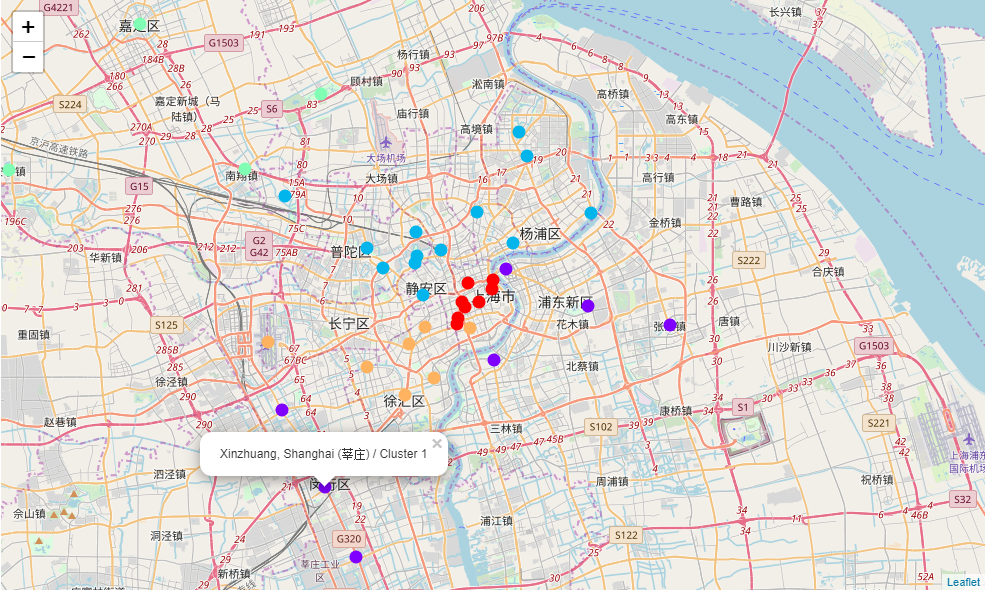

In [76]:
# Upload Screenshot
Image(filename=path+"Shanghai Clustered Neighborhoods.png")

#### 11.b Statistics of each cluster

##### 11.b.1 Define a function that returns statistics of each cluster

In [77]:
def statistics(shanghai_merged,num):
    
    print(' Average GDP PP of this cluster is {:.1f} yuan.\n Average personal monthly salary of this cluster is {:.1f} yuan/month.\n Average home price of this cluster is {:.1f} yuan/square meter.'.format
     (shanghai_merged[shanghai_merged['Cluster']==num]['GDP PP'].mean(axis=0),
     shanghai_merged[shanghai_merged['Cluster']==num]['Salary'].mean(axis=0),
     shanghai_merged[shanghai_merged['Cluster']==num]['Home Price'].mean(axis=0)))
    
    return(shanghai_merged[shanghai_merged['Cluster']==num][['Neighbourhood','Neighborhood Chinese Name','District']])

##### Cluster 3

In [78]:
statistics(shanghai_merged,3)

 Average GDP PP of this cluster is 91876.6 yuan.
 Average personal monthly salary of this cluster is 7558.8 yuan/month.
 Average home price of this cluster is 34959.2 yuan/square meter.


Neighbourhood Neighborhood Chinese Name   District
0        Anting, Shanghai                        安亭    Jiading
9    Gucun Park, Shanghai                      顾村公园    Baoshan
10  Haiwan Zhen, Shanghai                       海湾镇   Fengxian
14      Jiading, Shanghai                        嘉定    Jiading
23     Nanxiang, Shanghai                        南翔    Jiading
26       Qingpu, Shanghai                        青浦     Qingpu
28    Songjiang, Shanghai                        松江  Songjiang
39   Youyi Road, Shanghai                       友谊路    Baoshan

##### Cluster 2

In [80]:
statistics(shanghai_merged,2)

 Average GDP PP of this cluster is 109750.9 yuan.
 Average personal monthly salary of this cluster is 7795.4 yuan/month.
 Average home price of this cluster is 59504.4 yuan/square meter.


Neighbourhood Neighborhood Chinese Name District
2                    Caoyang, Shanghai                        曹杨    Putuo
4             Changshou Road, Shanghai                       长寿路    Putuo
6               Dinghai Road, Shanghai                       定海路   Yangpu
16            Jiangning Road, Shanghai                       江宁路  Jing'an
17            Jing'an Temple, Shanghai                       静安寺  Jing'an
21                Luxun Park, Shanghai                      鲁迅公园  Hongkou
27  Shanghai Railway Station, Shanghai                     上海火车站  Jing'an
29              Taopu Xincun, Shanghai                       桃浦镇    Putuo
31                 Tilanqiao, Shanghai                       提篮桥  Hongkou
32               Wujiaochang, Shanghai                       五角场   Yangpu
34         Xin Jiangwancheng, Shanghai                      新江湾城   Yangpu
38              Yichuan Park, Shanghai                       宜川路    Putuo
42                    Zhenru, Shanghai                        真如    Putuo

##### Cluster 0

In [81]:
statistics(shanghai_merged,0)

 Average GDP PP of this cluster is 320701.0 yuan.
 Average personal monthly salary of this cluster is 7160.0 yuan/month.
 Average home price of this cluster is 81375.0 yuan/square meter.


Neighbourhood Neighborhood Chinese Name District
5                   Dapuqiao, Shanghai                       打浦桥  Huangpu
7   Former French Concession, Shanghai                      旧法租界  Huangpu
13              Huaihai Road, Shanghai                       淮海路  Huangpu
18                  Laoximen, Shanghai                       老西门  Huangpu
24           People's Square, Shanghai                      人民广场  Huangpu
30                  The Bund, Shanghai                        外滩  Huangpu
35                 Xintiandi, Shanghai                       新天地  Huangpu
40                 Yu Garden, Shanghai                        豫园  Huangpu

##### Cluster 4

In [82]:
statistics(shanghai_merged,4)

 Average GDP PP of this cluster is 158217.9 yuan.
 Average personal monthly salary of this cluster is 7751.4 yuan/month.
 Average home price of this cluster is 70328.9 yuan/square meter.


Neighbourhood Neighborhood Chinese Name   District
1       Caohejing, Shanghai                       漕河泾      Xuhui
8           Gubei, Shanghai                        古北  Changning
11  Hengshan Road, Shanghai                       衡山路      Xuhui
12       Hongqiao, Shanghai                        虹桥  Changning
19        Longhua, Shanghai                        龙华      Xuhui
33     Xietu Road, Shanghai                       斜土路      Xuhui
37       Xujiahui, Shanghai                       徐家汇      Xuhui

##### Cluster 1

In [83]:
statistics(shanghai_merged,1)

 Average GDP PP of this cluster is 126915.2 yuan.
 Average personal monthly salary of this cluster is 8092.2 yuan/month.
 Average home price of this cluster is 47973.0 yuan/square meter.


Neighbourhood Neighborhood Chinese Name District
3      Century Park, Shanghai                      世纪公园   Pudong
15  Jiangchuan Road, Shanghai                       江川路  Minhang
20         Lujiazui, Shanghai                       陆家嘴   Pudong
22           Maqiao, Shanghai                        马桥  Minhang
25       Qibao Zhen, Shanghai                        七宝  Minhang
36        Xinzhuang, Shanghai                        莘庄  Minhang
41       Zhangjiang, Shanghai                        张江   Pudong
43        Zhoujiadu, Shanghai                       周家渡   Pudong
44        Zhuanqiao, Shanghai                        颛桥  Minhang

#### 11.b.4 Visualization of statistics

##### Bar chart of GDP Per Capita

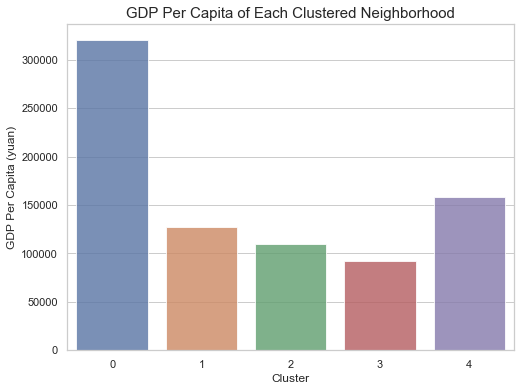

In [125]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot("Cluster","GDP PP", data=cluster_stat,alpha=0.8)
plt.title('GDP Per Capita of Each Clustered Neighborhood',fontsize=15)
plt.ylabel('GDP Per Capita (yuan)')
plt.xlabel('Cluster')
plt.show()

##### Bar chart of personal monthly salary

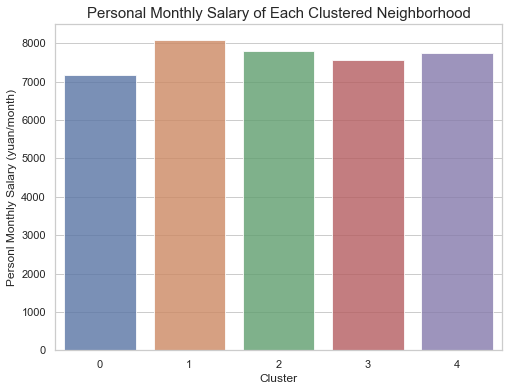

In [128]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot("Cluster","Salary", data=cluster_stat,alpha=0.8)
plt.title("Personal Monthly Salary of Each Clustered Neighborhood",fontsize=15)
plt.ylabel('Personl Monthly Salary (yuan/month)')
plt.xlabel('Cluster')
plt.show()

##### Bar chart of home price

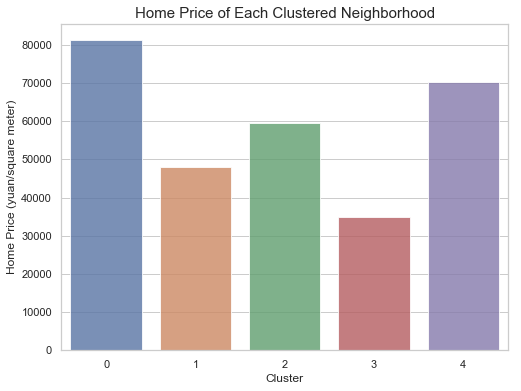

In [127]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot("Cluster","Home Price", data=cluster_stat,alpha=0.8)
plt.title("Home Price of Each Clustered Neighborhood",fontsize=15)
plt.ylabel('Home Price (yuan/square meter)')
plt.xlabel('Cluster')
plt.show()